In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint as randint
from datetime import datetime
from sklearn.cross_validation import cross_val_score
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt
%matplotlib inline

train=pd.read_csv('data/train.csv')

train_prepare=train.copy()
train_prepare=pd.get_dummies(train_prepare, 
                          columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
X=train_prepare.drop(['target', '_id'], axis=1).values
y=train_prepare['target'].values

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [7]:
n_folds = 3
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=123)

print(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=100), X, y, cv=cv.split(X, y), scoring='roc_auc', n_jobs=-1)))
print(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1000), X, y, cv=cv.split(X, y), scoring='roc_auc', n_jobs=-1)))
print(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=2000), X, y, cv=cv.split(X, y), scoring='roc_auc', n_jobs=-1)))

0.8778184661330038
0.8885305383838039
0.8865496824575301


In [8]:
param_grid_tr = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']
}

n_folds = 10
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=123)

model_tr  = DecisionTreeClassifier(random_state=123)
random_search_tr = RandomizedSearchCV(model_tr, param_distributions=param_grid_tr, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)

random_search_tr.fit(X, y)
print('Дерево решений, лучшая модель:', random_search_tr.best_params_)
print('---------------------------------------------------------------------------------', '\n')
print('Дерево решений, лучший roc_auc:', random_search_tr.best_score_)
print('-------------------------------------------------------------------------------------------------------', '\n')

Дерево решений, лучшая модель: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8}
--------------------------------------------------------------------------------- 

Дерево решений, лучший roc_auc: 0.9359967134961262
------------------------------------------------------------------------------------------------------- 



In [9]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
    'class_weight': [None, 'balanced']
                }
n_folds = 10
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=123)

model_lr  = LogisticRegression(random_state=123)
random_search_lr = RandomizedSearchCV(model_lr, param_distributions=param_grid_lr, n_iter=20, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
random_search_lr.fit(X, y)
print('Логистическая регрессия, лучшая модель:', random_search_lr.best_params_)
print('---------------------------------------------------------------------------------', '\n')
print('Логистическая регрессия, лучший roc_auc:', random_search_lr.best_score_)
print('-------------------------------------------------------------------------------------------------------', '\n')

Логистическая регрессия, лучшая модель: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.1}
--------------------------------------------------------------------------------- 

Логистическая регрессия, лучший roc_auc: 0.9360800996809563
------------------------------------------------------------------------------------------------------- 



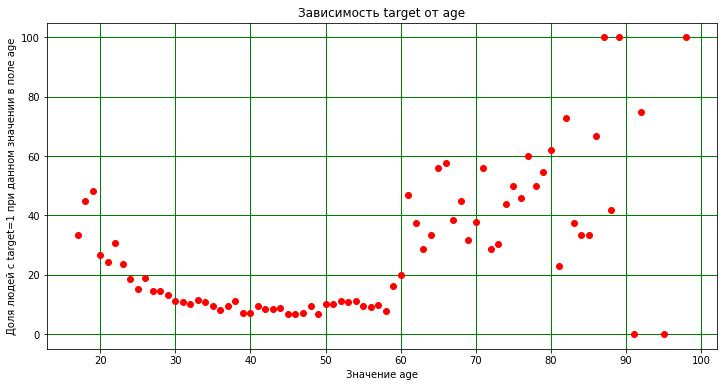

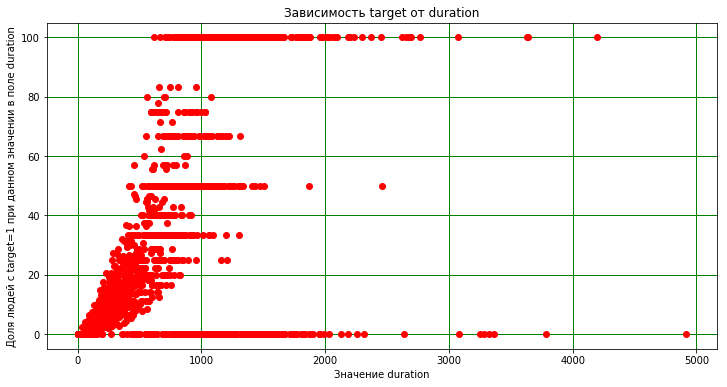

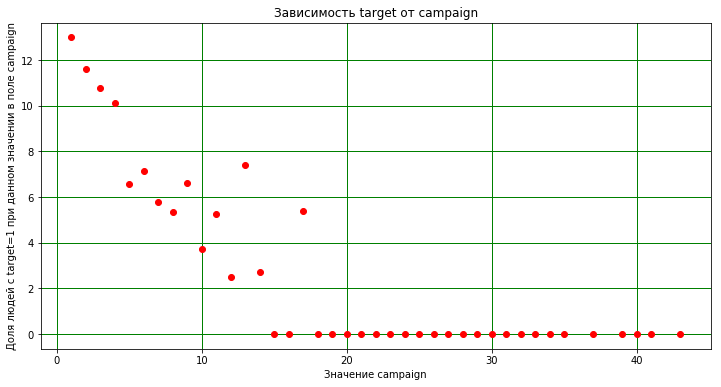

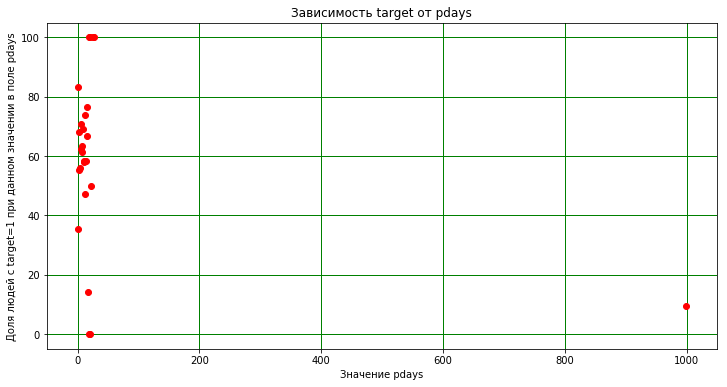

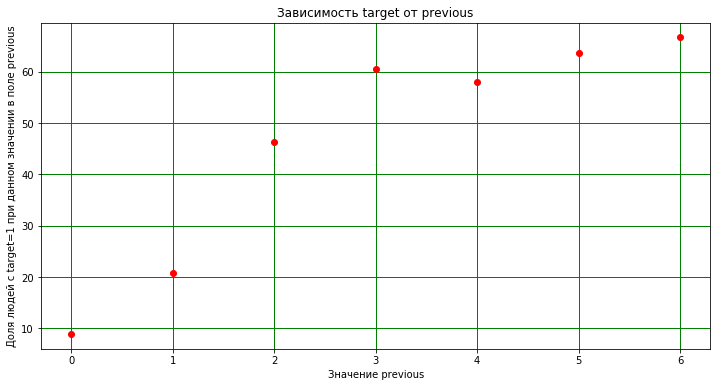

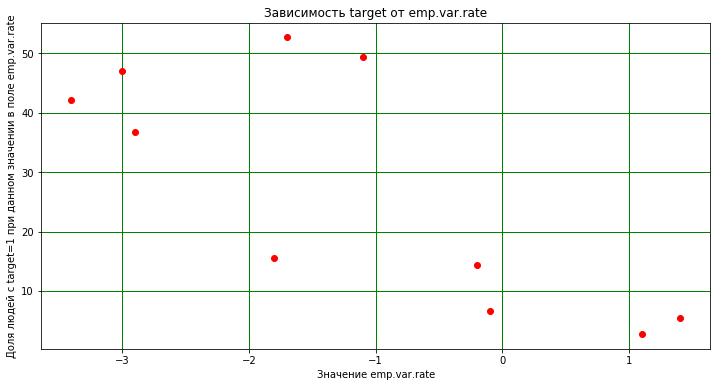

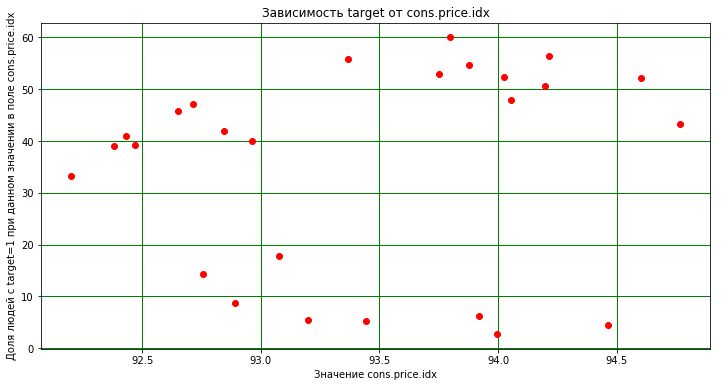

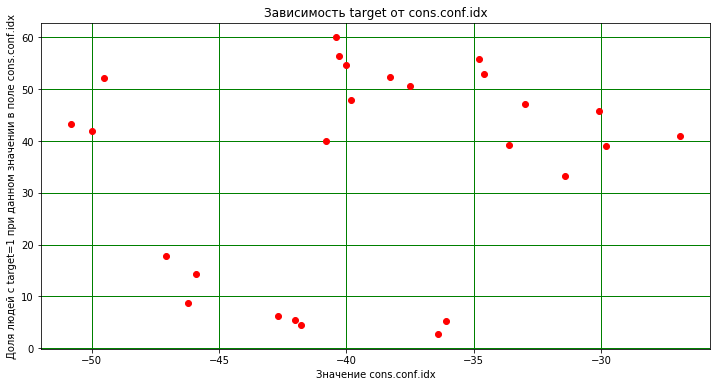

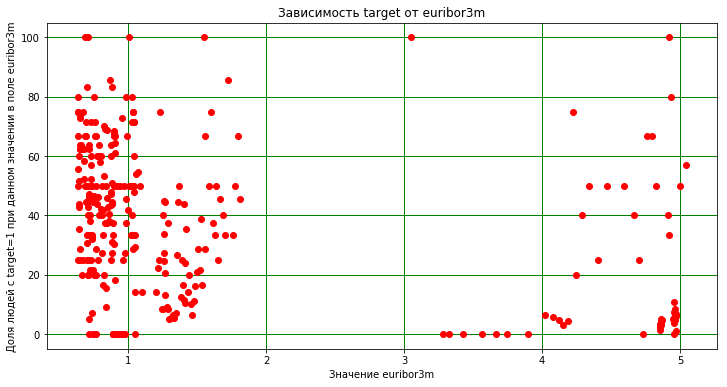

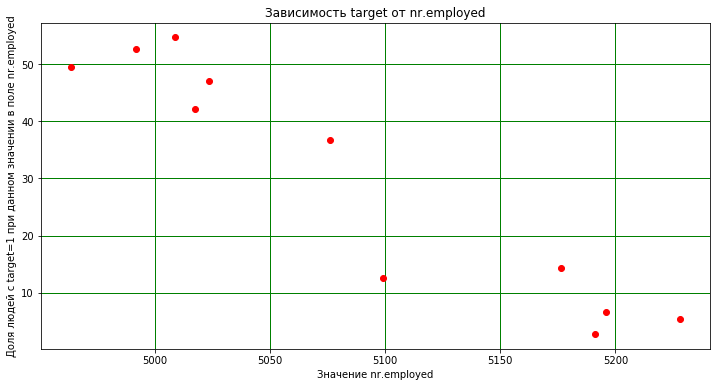

In [12]:
#------------------------------------------------------------------------------
for column_name in list(('age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                         'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed')):
    plt.figure(figsize=(12,6))
    
    plt.plot(train.groupby(column_name)['target'].sum()*100/train.groupby(column_name)['target'].count(), 'ro')

    ax = plt.gca();
    ax.grid(color='g', linestyle='-', linewidth=1)

    plt.ylabel('Доля людей с target=1 при данном значении в поле '+column_name)
    plt.xlabel('Значение '+column_name)
    plt.title('Зависимость target от '+column_name)

    plt.show()
    
#------------------------------------------------------------------------------
train_prepare=train.copy()
train_prepare['duration1000']=train_prepare['duration'].apply(lambda x: min(x, 1000))
train_prepare['pdays_flg']   =train_prepare['pdays'].apply(lambda x: int(x<999))
train_prepare                =train_prepare.drop(['duration', 'pdays', 'cons.price.idx'], axis=1)
train_prepare                =pd.get_dummies(train_prepare, 
                          columns=['job', 'marital', 'education', 'default', 'housing', 
                                   'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
X=train_prepare.drop(['target', '_id'], axis=1).values
y=train_prepare['target'].values

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [13]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
    'class_weight': [None, 'balanced']
                }
n_folds = 10
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=123)

model_lr  = LogisticRegression(random_state=123)
random_search_lr = RandomizedSearchCV(model_lr, param_distributions=param_grid_lr, n_iter=20, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
random_search_lr.fit(X, y)
print('Логистическая регрессия, лучшая модель:', random_search_lr.best_params_)
print('---------------------------------------------------------------------------------', '\n')
print('Логистическая регрессия, лучший roc_auc:', random_search_lr.best_score_)
print('-------------------------------------------------------------------------------------------------------', '\n')

Логистическая регрессия, лучшая модель: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.1}
--------------------------------------------------------------------------------- 

Логистическая регрессия, лучший roc_auc: 0.9363087885679702
------------------------------------------------------------------------------------------------------- 



In [17]:
model_lr  = LogisticRegression(random_state=123, penalty='l1', class_weight='balanced', C=0.1)
model_lr.fit(X, y)

test=pd.read_csv('data/test.csv')
test_prepare=test.copy()
test_prepare['duration1000']=test_prepare['duration'].apply(lambda x: min(x, 1000))
test_prepare['pdays_flg']   =test_prepare['pdays'].apply(lambda x: int(x<999))
test_prepare                =test_prepare.drop(['duration', 'pdays', 'cons.price.idx'], axis=1)
test_prepare                =pd.get_dummies(test_prepare, 
                          columns=['job', 'marital', 'education', 'default', 'housing', 
                                   'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
X_test=test_prepare.drop(['_id'], axis=1).values

scaler=StandardScaler()
scaler.fit(X_test)
X_test=scaler.transform(X_test)

y_pred=model_lr.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
answer=pd.DataFrame(y_pred, columns=['target'])
answer['_id']=test_prepare['_id']

res=answer[['_id', 'target']].copy()
res.to_csv('data/sf05classification.csv', sep=',', header=True, index=False)

In [29]:
y_pred_proba=model_lr.predict_proba(X_test)[:, 0]
answer_proba=pd.DataFrame(y_pred_proba, columns=['target'])
answer_proba['_id']=test_prepare['_id']

res_proba=answer_proba[['_id', 'target']].copy()
res_proba.to_csv('data/sf05classification_proba.csv', sep=',', header=True, index=False)